<center><b><h1>Crop Production Analysis in India</h1></b></center>
<p style= "text-align: right">By Vedansh Chauhan</p>

#### Contents:
- [Introduction](#section-one)
- [Stage 1: Data Acquisition](#section-two)
- [Stage 2: Data Preprocessing](#section-three)
- [Stage 3: Exploratory Data Analysis](#section-four)
- [Conclusion](#section-five)

## Introduction
Crop production is a crucial aspect of agriculture, involving the cultivation of plants for food, fiber, and other essential resources. The efficiency of crop production depends on factors like soil quality, weather, pest control, and farming techniques. Analyzing these elements helps farmers optimize practices to increase yield, reduce costs, and ensure sustainability.

This project utilizes a dataset of crop production in India spanning over decades to comprehend the factors that affect the production of crops.

#### Problem Statement:
The Agriculture business domain, as a vital part of the overall supply chain, is expected to highly evolve in the upcoming years via the developments, which are taking place on the side of the Future Internet. This dataset provides a huge amount of information on crop production in India ranging from several years. Based on the Information the ultimate goal would be to predict crop production and find important insights highlighting key indicators and metrics that influence crop production.

#### Objectives:
- Analyze the crop production data.
- Identify the metrics that influence crop production.
- Provide personal inputs and suggestions.

## Stage 1: DATA ACQUISITION <a id="section-two"></a>
#### Objectives:
- Importing the libraries
- Importing the dataset

#### Importing the libraries

In [6]:
#Basic Libraries
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the dataset

In [8]:
crop = pd.read_csv("C:\\Users\\Vedansh Chauhan\\Documents\I2\\Project 7\\Crop Production data.csv")
crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [9]:
crop.shape

(246091, 7)

In [10]:
print('The various columns in the data are:')
count=1
for i in crop.columns:
    print(f"{count}. {i}")
    count+=1

The various columns in the data are:
1. State_Name
2. District_Name
3. Crop_Year
4. Season
5. Crop
6. Area
7. Production


<center><b><h3>DATA DICTIONARY</h3></b></center>

|Serial No.|Column Name|Explanation|
|-|-|-|
| 1 | State_Name | Name of the Indian state where the crop was produced. |
| 2 | District_Name | Name of the district within the state where the crop was produced. |
| 3 | Crop_Year | Numerical year the crop was harvested. |
| 4 | Season | The planting season. |
| 5 | Crop | Type of crop grown. |
| 6 | Area | The area planted with the crop. |
| 7 | Production | Quantity of the crop harvested. |

In [12]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


*There appear to be no null values in the independent variable columns, but a few in the dependent variable column.*

## Stage 2: DATA PREPROCESSING <a id="section-three"></a>
#### Objectives:
- Imputation
- Duplicate Records Elimination
- Feature Engineering

#### Imputation
Imputation isn't necessary for any of the independent columns as observed above. However, I do need to check if the null values in the dependent colummn are indeed zero or 'Nan'in which case, they'd need to be changed to 0.

In [16]:
total_rows = crop.shape[0]
nan_rows = crop['Production'].isna().sum()
print(f"Number of rows in the data: {total_rows} rows\nNumber of NaN rows in the data: {nan_rows} rows")
print(f"Percentage of rows with NaN values in the data: {((nan_rows/total_rows)*100):.2f}%")

Number of rows in the data: 246091 rows
Number of NaN rows in the data: 3730 rows
Percentage of rows with NaN values in the data: 1.52%


#### Observation:
A percentage of 1.52% NaN values out of over two hundred thousand rows isn't a significant amount of data. Since these are numeric values, imputation using mean, median, mode, or a singular value might not be accurate.
#### Next Step:
Considering the low amount of these NaN rows, I'll remove them from further analysis.

In [18]:
#Removing NaN rows
crop.dropna(subset=['Production'], inplace=True)

*The NaN value rows have been removed.*

#### Duplicate Records Elimination

In [21]:
print(f"There are {crop.duplicated().sum()} duplicate values in the data.")

There are 0 duplicate values in the data.


#### Feature Engineering

In [23]:
#Creating a 'Yield' column
crop['Yield'] = crop['Production']/crop['Area']

In [24]:
#Exporting the data
#crop.to_csv('crop_analysis.csv')

## Stage 3: EXPLORATORY DATA ANALYSIS (EDA) <a id="section-four"></a>
#### Objectives:
- General Statistics
- Production Analysis
- Yield Analysis

#### General Statistics

In [27]:
#Total Number of States
print(f"The data includes {crop['State_Name'].nunique()} Indian States.")

The data includes 33 Indian States.


In [28]:
#Number of Districts
print(f"The data includes {crop['District_Name'].nunique()} Indian Districts.")

The data includes 646 Indian Districts.


In [29]:
#Range in years
min=crop['Crop_Year'].min()
max=crop['Crop_Year'].max()
print(f"The data spans from {min} through {max}, covering a period of {max-min} years.")

The data spans from 1997 through 2015, covering a period of 18 years.


In [30]:
#Crop seasons included in the data
print("The data includes the following seasons:")
count=1
for i in crop['Season'].unique():
    print(f"{count}. {i}")
    count+=1

The data includes the following seasons:
1. Kharif     
2. Whole Year 
3. Autumn     
4. Rabi       
5. Summer     
6. Winter     


In [31]:
#Smallest area of land
print(f"The smallest area of land of production is {crop['Area'].min()} square units.")

The smallest area of land of production is 0.1 square units.


In [32]:
#Largest area of land
print(f"The largeestv area of land of production is {crop['Area'].max()} square units.")

The largeestv area of land of production is 8580100.0 square units.


In [33]:
#Least Production
least_district = crop.sort_values(by='Production').iloc[0]['District_Name']
least_state = crop.sort_values(by='Production').iloc[0]['State_Name']

print(f"The least amount of production is {crop['Production'].min()} square units in the district of {least_district} of the state {least_state}.")

The least amount of production is 0.0 square units in the district of KHEDA of the state Gujarat.


In [34]:
#Most Production
most_district = crop.sort_values(by='Production', ascending=False).iloc[0]['District_Name']
most_state = crop.sort_values(by='Production', ascending=False).iloc[0]['State_Name']

print(f"The most amount of production is {crop['Production'].max()} square units in the district of {most_district} of the state {most_state}.")

The most amount of production is 1250800000.0 square units in the district of COIMBATORE of the state Tamil Nadu.


In [35]:
#Least Yield
least_district_y = crop.sort_values(by='Yield').iloc[0]['District_Name']
least_state_y = crop.sort_values(by='Yield').iloc[0]['State_Name']

print(f"The least amount of production is {crop['Yield'].min()} square units in the district of {least_district_y} of the state {least_state_y}.")

The least amount of production is 0.0 square units in the district of PALAKKAD of the state Kerala.


In [36]:
#Most Yield
most_district_y = crop.sort_values(by='Yield').iloc[0]['District_Name']
most_state_y = crop.sort_values(by='Yield').iloc[0]['State_Name']

print(f"The least amount of production is {crop['Yield'].max()} square units in the district of {most_district_y} of the state {most_state_y}.")

The least amount of production is 88000.0 square units in the district of PALAKKAD of the state Kerala.


#### Production Analysis

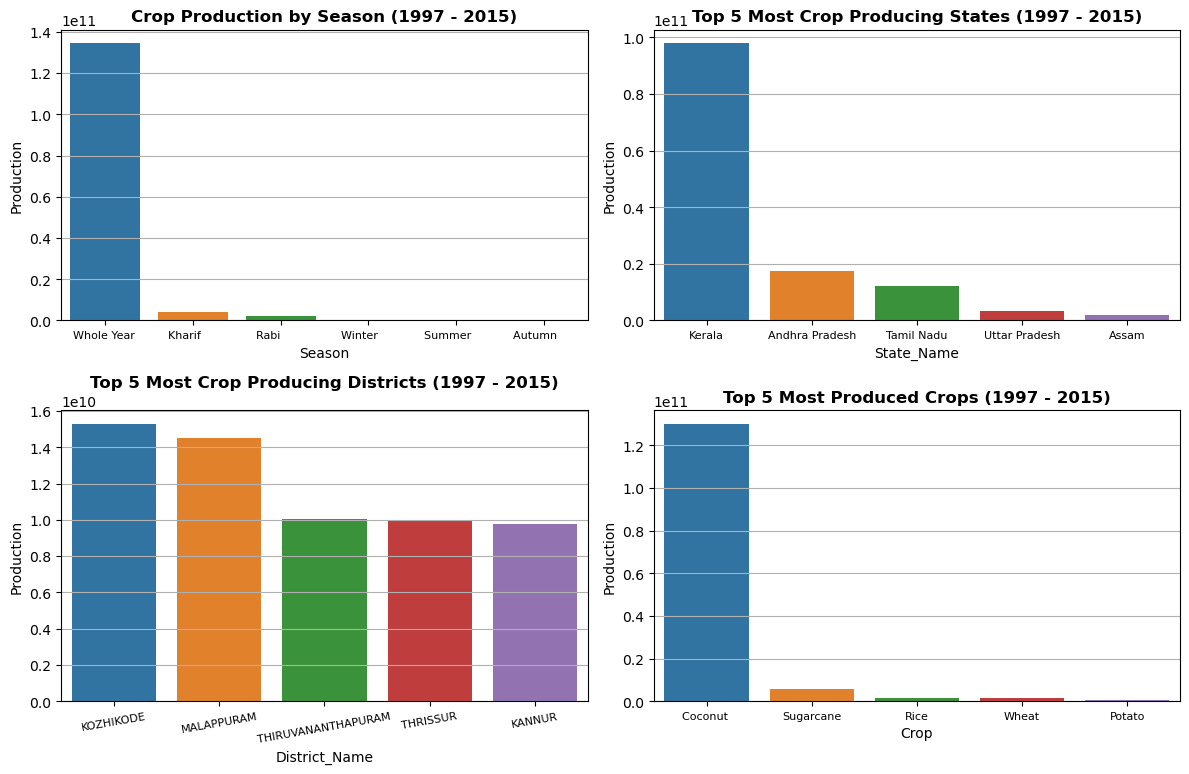

In [38]:
seasons_p = crop.groupby('Season')['Production'].sum().sort_values(ascending=False).reset_index()
top_5_states = crop.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(n=5).reset_index()
top_5_districts = crop.groupby('District_Name')['Production'].sum().sort_values(ascending=False).head(n=5).reset_index()
top_5_crops = crop.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(n=5).reset_index()

#Subpplots
fig, axes = plt.subplots(2,2, figsize=(12,8))

#Production by Season
sns.barplot(data=seasons_p, x='Season', y='Production', ax=axes[0,0], hue='Season')
axes[0,0].set_title('Crop Production by Season (1997 - 2015)', fontweight='bold')
axes[0,0].tick_params(axis='x', labelsize=8)
axes[0,0].grid(axis='y')

#Production by State
sns.barplot(data=top_5_states, x='State_Name', y='Production', ax=axes[0,1], hue='State_Name')
axes[0,1].set_title('Top 5 Most Crop Producing States (1997 - 2015)', fontweight='bold')
axes[0,1].tick_params(axis='x', labelsize=8)
axes[0,1].grid(axis='y')

#Production by District
sns.barplot(data=top_5_districts, x='District_Name', y='Production', ax=axes[1,0], hue='District_Name')
axes[1,0].set_title('Top 5 Most Crop Producing Districts (1997 - 2015)', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=10, labelsize=8)
axes[1,0].grid(axis='y')

#Production by Crop
sns.barplot(data=top_5_crops, x='Crop', y='Production', ax=axes[1,1], hue='Crop')
axes[1,1].set_title('Top 5 Most Produced Crops (1997 - 2015)', fontweight='bold')
axes[1,1].tick_params(axis='x',labelsize=8)
axes[1,1].grid(axis='y')

plt.tight_layout()
plt.show()

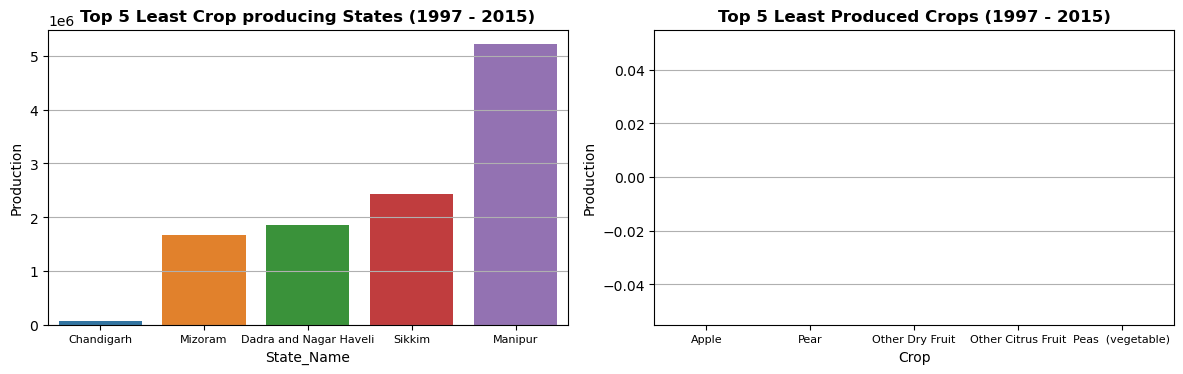

In [39]:
least_5_states = crop.groupby('State_Name')['Production'].sum().sort_values().head(n=5).reset_index()
least_5_crops = crop.groupby('Crop')['Production'].sum().sort_values().head(n=5).reset_index()

#Subpplots
fig, axes = plt.subplots(1,2, figsize=(12,4))

#Production by State
sns.barplot(data=least_5_states, x='State_Name', y='Production', ax=axes[0], hue='State_Name')
axes[0].set_title('Top 5 Least Crop producing States (1997 - 2015)', fontweight='bold')
axes[0].tick_params(axis='x', labelsize=8)
axes[0].grid(axis='y')

#Production by Crop
sns.barplot(data=least_5_crops, x='Crop', y='Production', ax=axes[1], hue='Crop')
axes[1].set_title('Top 5 Least Produced Crops (1997 - 2015)', fontweight='bold')
axes[1].tick_params(axis='x',labelsize=8)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

##### Trend of Crop Production over the years

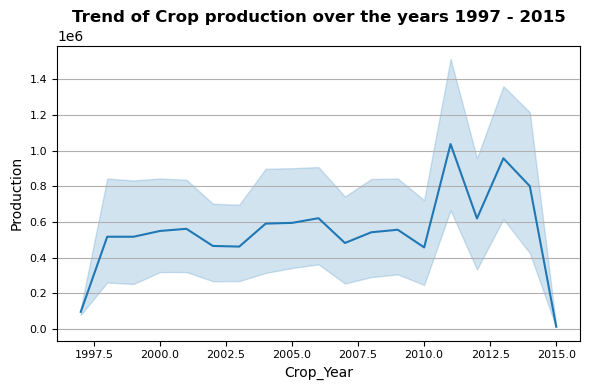

In [41]:
plt.figure(figsize=(6,4))
sns.lineplot(data=crop, x='Crop_Year', y='Production')
plt.title('Trend of Crop production over the years 1997 - 2015', fontweight='bold')
plt.tick_params(labelsize=8)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Most produced crops in every season

In [43]:
most_p_crops=crop.groupby(['Season', 'Crop'])['Production'].sum().reset_index().sort_values(by='Production', ascending=False).drop_duplicates(subset='Season')
most_p_crops

,Season,Crop,Production
232,Whole Year,Coconut,1.299815e+11
93,Kharif,Sugarcane,1.774444e+09
172,Rabi,Wheat,1.323890e+09
327,Winter,Rice,3.815695e+08
196,Summer,Rice,1.277028e+08
15,Autumn,Rice,5.185376e+07


##### Least produced crops in every season

In [45]:
least_p_crops=crop.groupby(['Season', 'Crop'])['Production'].sum().reset_index().sort_values(by='Production').drop_duplicates(subset='Season')
least_p_crops

,Season,Crop,Production
265,Whole Year,Other Citrus Fruit,0.0
311,Winter,Coriander,4.0
139,Rabi,Moth,13.0
203,Summer,Turmeric,20.0
2,Autumn,Cotton(lint),20.0
104,Kharif,Wheat,61.8


##### Most yielded crops in every season

In [47]:
most_y_crops=crop.groupby(['Season', 'Crop'])['Yield'].sum().reset_index().sort_values(by='Yield', ascending=False).drop_duplicates(subset='Season')
most_y_crops

,Season,Crop,Yield
232,Whole Year,Coconut,7.910422e+06
93,Kharif,Sugarcane,6.521630e+04
150,Rabi,Potato,2.722019e+04
331,Winter,Sugarcane,2.621220e+04
189,Summer,Onion,9.714756e+03
8,Autumn,Maize,8.521375e+03


##### Least yielded crops in every season

In [49]:
least_y_crops=crop.groupby(['Season', 'Crop'])['Yield'].sum().reset_index().sort_values(by='Yield').drop_duplicates(subset='Season')
least_y_crops

,Season,Crop,Yield
265,Whole Year,Other Citrus Fruit,0.000000
312,Winter,Cotton(lint),0.333333
104,Kharif,Wheat,0.395832
203,Summer,Turmeric,0.666667
2,Autumn,Cotton(lint),0.666667
139,Rabi,Moth,0.866667


#### Yield Analysis

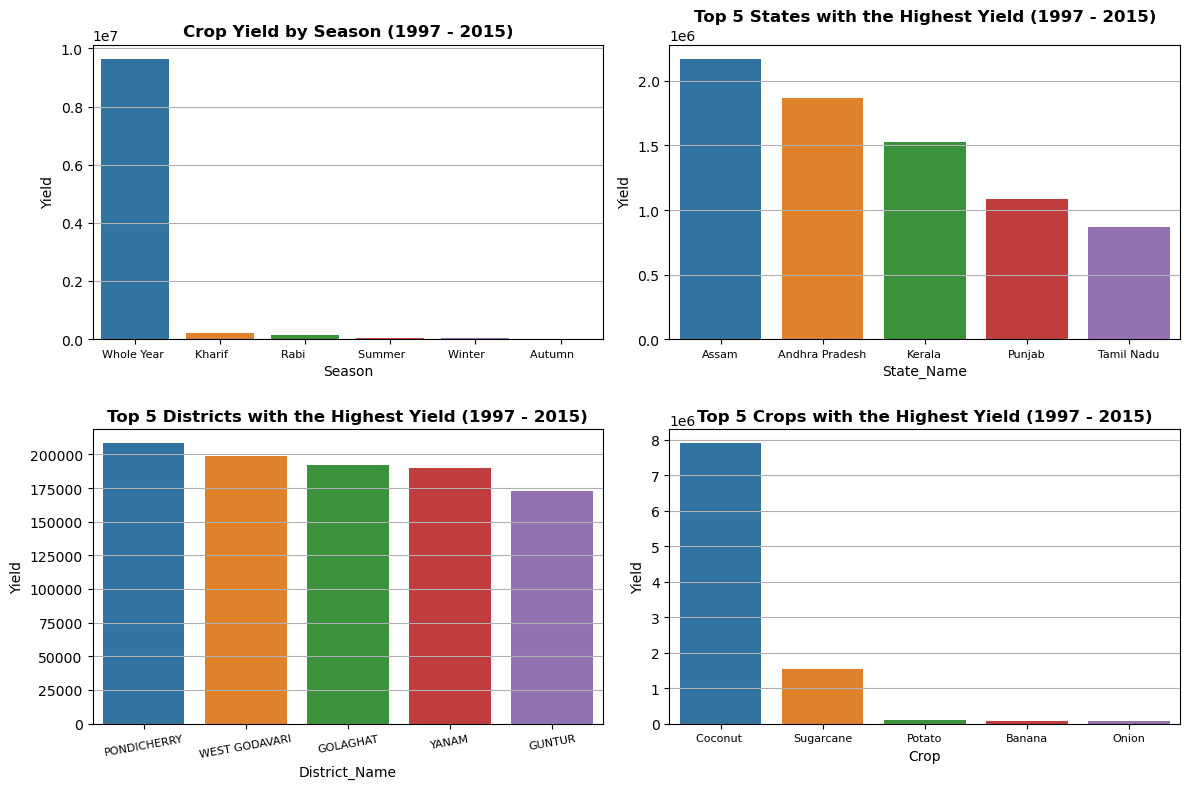

In [51]:
seasons_y = crop.groupby('Season')['Yield'].sum().sort_values(ascending=False).reset_index()
top_5_states = crop.groupby('State_Name')['Yield'].sum().sort_values(ascending=False).head(n=5).reset_index()
top_5_districts = crop.groupby('District_Name')['Yield'].sum().sort_values(ascending=False).head(n=5).reset_index()
top_5_crops = crop.groupby('Crop')['Yield'].sum().sort_values(ascending=False).head(n=5).reset_index()

#Subpplots
fig, axes = plt.subplots(2,2, figsize=(12,8))

#Production by Season
sns.barplot(data=seasons_y, x='Season', y='Yield', ax=axes[0,0], hue='Season')
axes[0,0].set_title('Crop Yield by Season (1997 - 2015)', fontweight='bold')
axes[0,0].tick_params(axis='x', labelsize=8)
axes[0,0].grid(axis='y')

#Production by State
sns.barplot(data=top_5_states, x='State_Name', y='Yield', ax=axes[0,1], hue='State_Name')
axes[0,1].set_title('Top 5 States with the Highest Yield (1997 - 2015)', fontweight='bold')
axes[0,1].tick_params(axis='x', labelsize=8)
axes[0,1].grid(axis='y')

#Production by District
sns.barplot(data=top_5_districts, x='District_Name', y='Yield', ax=axes[1,0], hue='District_Name')
axes[1,0].set_title('Top 5 Districts with the Highest Yield (1997 - 2015)', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=10, labelsize=8)
axes[1,0].grid(axis='y')

#Production by Crop
sns.barplot(data=top_5_crops, x='Crop', y='Yield', ax=axes[1,1], hue='Crop')
axes[1,1].set_title('Top 5 Crops with the Highest Yield (1997 - 2015)', fontweight='bold')
axes[1,1].tick_params(axis='x',labelsize=8)
axes[1,1].grid(axis='y')

plt.tight_layout()
plt.show()

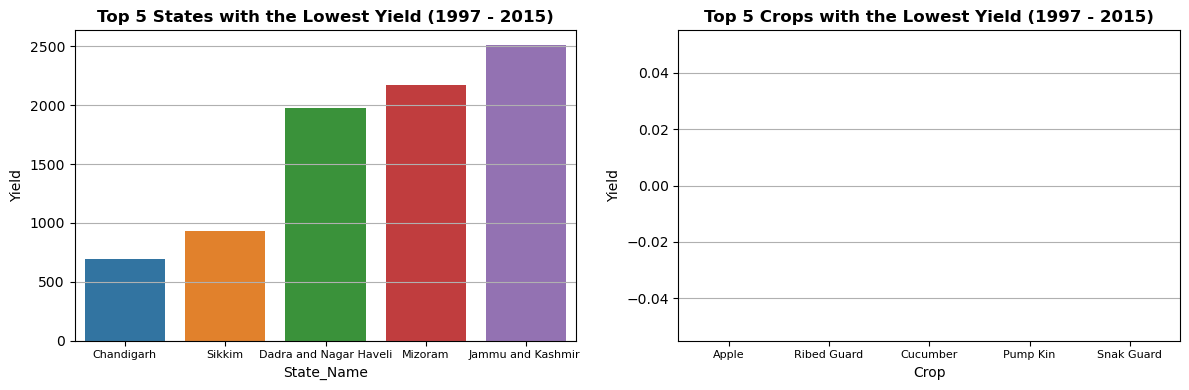

In [52]:
least_5_states_y = crop.groupby('State_Name')['Yield'].sum().sort_values().head(n=5).reset_index()
least_5_crops_y = crop.groupby('Crop')['Yield'].sum().sort_values().head(n=5).reset_index()

#Subpplots
fig, axes = plt.subplots(1,2, figsize=(12,4))

#Production by State
sns.barplot(data=least_5_states_y, x='State_Name', y='Yield', ax=axes[0], hue='State_Name')
axes[0].set_title('Top 5 States with the Lowest Yield (1997 - 2015)', fontweight='bold')
axes[0].tick_params(axis='x', labelsize=8)
axes[0].grid(axis='y')

#Production by Crop
sns.barplot(data=least_5_crops_y, x='Crop', y='Yield', ax=axes[1], hue='Crop')
axes[1].set_title('Top 5 Crops with the Lowest Yield (1997 - 2015)', fontweight='bold')
axes[1].tick_params(axis='x',labelsize=8)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

##### Trend of Crop Yield over the years

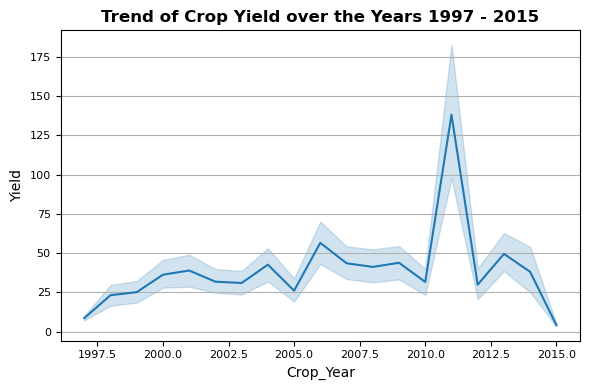

In [54]:
plt.figure(figsize=(6,4))
sns.lineplot(data=crop, x='Crop_Year', y='Yield')
plt.title('Trend of Crop Yield over the Years 1997 - 2015', fontweight='bold')
plt.tick_params(labelsize=8)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## CONCLUSION <a id="section-five"></a>Based on the analysis conducted in this study and the insights from my PowerBI Dashboard, I have arrived at the following conclusions::

- The total time period of the data spanned 18 years, ranging from 1997 to 2015.
- There were 124 different types of crops produced.
- 33 regions, including Indian states and Union Territories, contributed to the cultivation and production of crops.
- Coconut was the highest produced and yielded crop.
- Coconut cultivation depicts a high level of efficiency and yield as it wasn't even among the top 5 most frequently cultivated crops yet managed to have the highest yield and production.
- Kerala was the highest crop-producing state.
- While Uttar Pradesh wasn't the top contributor (it was the 4th highest), it had the most land under cultivation.
- Rice was the most widely cultivated crop and the third highest produced crop, falling behind Coconut and Sugarcane. It was also the most frequently cultivated crop.
- The Kharif season experienced the most frequent production, yet the crops cultivated and produced throughout the year resulted in the highest amount of production.
- Assam was the highest-yielding state, suggesting a high degree of efficiency.
- Total production was the highest in the year 2011, then dipped in 2012, rose again in 2013, and has been on a rapid decline ever since.
- The total area under cultivation as well as the frequency of cultivation has been declining as well.
- Yield briefly skyrocketed in 2011 and underwent a sharp dip ever since.

#### Recommendations:
- Better agricultural tools and practices should be implemented in states like Uttar Pradesh where the frequency of cultivation was high but the amount of production didn't justify that high frequency.
- Studies must be conducted to understand what led to the decline in production in the year 2012, what was done right in 2013 that led to a rise, and what factors again led to a decline.
- Studies must also be conducted to comprehend what factors have led to the decline in the total area under production and the sharp decline in yield after 2011.
- Better agricultural tools and machinery, as well as the cultivation of mass besides rice (since rice requires a lot more water), can help increase the income of farmers and diversify the types of crops produced.es of crops produced.

<p style="text-align:center;"> - THANK YOU - </p>